In [24]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [25]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [29]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [27]:
import numpy as np
from matplotlib import pyplot as plt

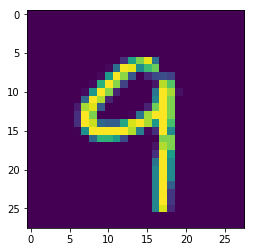

In [30]:
first_images = mnist.train.images[8]
first_images = np.array(first_images,dtype=float)
first_images = first_images.reshape((28,28))
plt.imshow(first_images)
plt.show()

In [16]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1' :tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' :tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' :tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'h1' :tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' :tf.Variable(tf.random_normal([n_hidden_2])),
    'out' :tf.Variable(tf.random_normal([n_classes]))
}

In [17]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output

In [19]:
x = tf.placeholder("float", [None, n_input])
y =tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [22]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y})
        total_cost += c
    print(total_cost)

26195.978781104088
4782.999719915679
2659.754247386007
1766.647032727775
1258.1978916078592
1313.908642009857
923.6087929298927
1002.927707328874
966.2113863471076
768.5977532732815
644.4193228646052
508.32833585399123
601.8837279102406
571.2006821803384
441.50869546869905
405.0802416469805
358.8093683532343
340.13673435389643
295.0025593246984
311.0793439694612
300.1486899402077
245.91736144495016
272.35117197873916
217.83883093611882
202.0996596726681


In [24]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9607